In [1]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import math

#initial values
v120max = 5
v20max = 7
stepcost = 30
saltcost = 400
size = 100
lmax = 5
blocks = 1
factoryblock = 1
maxsteps = 5

#current parameters
v120 = 0
v20 = 0
steps = 0
cds = [50,50]
start = [50,50]
profit = []   
sumprofit = []
home  = False

#initialize cells (strips)
q120 = []
q20 = []
free = []
for i in range(0,size-1, 2):
    for j in range(0,size):
        q120.append([i,j])
        q20.append([i+1,j])
q120.remove([50,50])

#distance between cell and machine
def dist(_list):
    return math.fabs(cds[0]-_list[0]) + math.fabs(cds[1]-_list[1])

#finding closest cell to current cell 
def findclosest(_free, _cell):
    _free = sorted(_free, key = lambda crd: math.fabs(_cell[0]-crd[0]) + math.fabs(_cell[1]-crd[1]))
    j = 0
    while dist(_free[j]) > maxsteps:
        j += 1
    return _free[j]

#factory works
def factory(minwh):
    if minwh <= factoryblock:
        if minwh is 0:
            return 0
        else:
            return minwh
    else:
        return factoryblock
    
#work
for i in range(730):
    q120 = sorted(q120, key = lambda crd: math.fabs(cds[0]-crd[0]) + math.fabs(cds[1]-crd[1]))
    if home is False:
        if dist(q120[0]) > maxsteps:
            cds = findclosest(free, q120[0])
            steps += maxsteps
        else:
            if v120 is not v120max:
                steps = dist(q120[0]) - 1
                cds = q120[0]
                free.append(q120[0])
                q120.pop(0)
                q20 = sorted(q20, key = lambda crd: math.fabs(cds[0]-crd[0]) + math.fabs(cds[1]-crd[1]))
            if dist(q20[0]) > maxsteps - steps:
                cds = findclosest(free, q20[0])
                steps += maxsteps
            else:
                if v20 is not v20max:
                    steps += dist(q20[0]) - 1
                    cds = q20[0]
                    free.append(q20[0])
                    steps += dist(q20[0]) - 1
                    q20.pop(0)
                    home = True
    else:
        if (dist(start) > maxsteps):
            cds = findclosest(free, start)
            steps += maxsteps
        else:
            cds = [50,50]
            v120 += blocks
            v20 += blocks
            home = False
    processed = factory(min(v20,v120))
    if steps < 0:
        steps = 0
    profit.append(processed * saltcost - stepcost * steps)
    if (i is 0):
        sumprofit.append(profit[0])
    sumprofit.append(sumprofit[len(sumprofit) - 1] + profit[len(profit) - 1])
    v20 -= processed
    v120 -= processed
    steps = 0
weekprofit = []
i = 0
j = 0
while (i != 730):
    if i%7 == 0:
        weekprofit.append(profit[i])
    else:
        weekprofit[i/7] += profit[i]
    i += 1
len(sumprofit)

IOError: [Errno 2] No such file or directory: '/tmp/matplotlib-denis/fontList.cache'

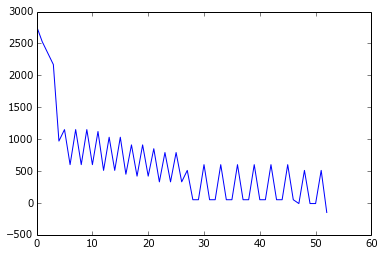

In [132]:
plt.plot(range(53),weekprofit)